# K-Nearest Neighbors (KNN) Model for Classification Tasks 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Checking the head of the dataframe**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Creating a Large Pairplot as Part of EDA

**Created a pairplot (using seaborn) with the hue indicated by the TARGET CLASS column**

In [ ]:
sns.pairplot(df,hue='TARGET CLASS')

## Standardizing the Variables

**Importing StandardScaler from Scikit-learn**

In [ ]:
from sklearn.preprocessing import StandardScaler

**Instantiating StandardScaler object to 'scaler' (or creating a StandardScaler object called scaler)**

In [6]:
scaler = StandardScaler()

**Fitting scaler to the features of the dataset**

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Transforming the features to a scaled version of the features using the .transform() method**

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Converting the scaled features to a dataframe and checking the head of the dataframe to make sure the scaling worked**

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Training and Testing Data

In [10]:
from sklearn.model_selection import train_test_split

**Setting X and y variables**

In [11]:
X = df_feat
y = df['TARGET CLASS']

**Splitting data into training set and testing set using train_test_split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training the Model Using KNN

**Importing KNeighborsClassifier (the KNN model) from scikit-learn**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

**Instantiating the KNN model to 'knn' with n_neighbors=1**

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

**Training/fitting the KNN model on the training data** 

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Predictions and Evaluations

**Predicting values using KNN model and X_test**

In [16]:
pred = knn.predict(X_test)

**Evaluating the model by creating a classification report and confusion matrix**

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


## Choosing a K Value

**Finding out an 'Optimal K Value' by choosing a graphical 'Elbow Method'**

*First creating a for loop that trains various KNN models with different k values, and then keeping track of the error_rate for each of these models with a list*

In [19]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

*Creating the plot using the information from this for loop*

Text(0, 0.5, 'Error Rate')

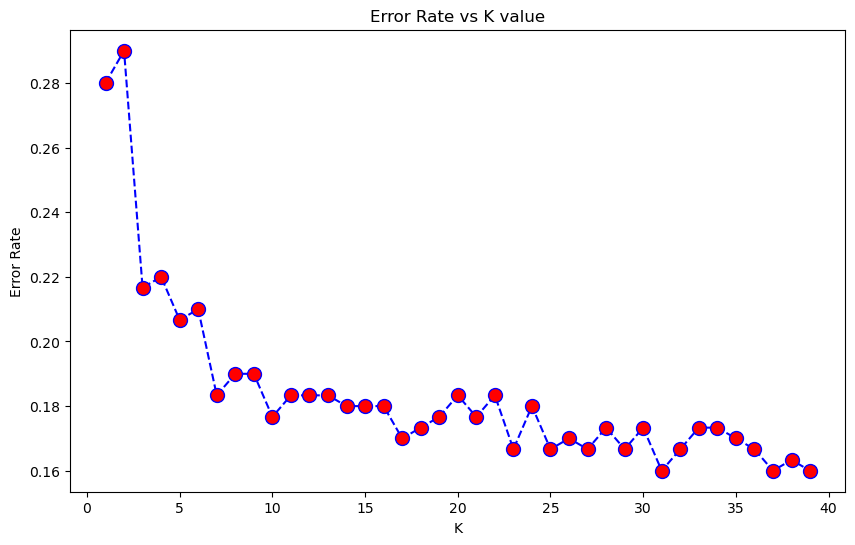

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retraining, Repredicting and Reevaluating Model With New K Value

**Retraining the model by choosing the best K value (i.e. K = 30) based on the above graph**

In [21]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

**Creating predictions of the new model using X_test**

In [22]:
pred = knn.predict(X_test)

**Evaluating the newly created model by creating a classification report and confusion matrix**

In [23]:
# Now with K = 30

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
print('\n')
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



[[124  28]
 [ 24 124]]
